In [276]:
# https://www.kaggle.com/ayushranjan15/eda-and-svm-basic-beginner for Inspiration
# All Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly as py
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go

In [277]:
#Importing Data File
df = pd.read_csv('data/FAO.csv',encoding ='latin-1')
df.dropna().shape
df=df.fillna(0)
#df.columns
df2 = df.drop(df.columns[[0,1,3,5,7,8,9]], axis=1, inplace=False)
#df2.head()
df2.columns

Index(['Area', 'Item', 'Element', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965',
       'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973',
       'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981',
       'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [278]:
# Create Dataframe for Pakistan only
df_pak = df2[(df['Area'].isin(['Pakistan']))]
df_pak = df_pak.drop(14818)
df_pak = df_pak.drop(14819)
df_pak[df_pak['Item'] == 'Milk - Excluding Butter']

#df_pak = df_pak.drop_duplicates('Item',keep='first')

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
14856,Pakistan,Milk - Excluding Butter,Feed,295.0,303.0,310.0,319.0,326.0,328.0,335.0,...,1402.0,1450.0,1532.0,1581.0,1636.0,1686.0,1744.0,1797.0,1868,1912
14857,Pakistan,Milk - Excluding Butter,Food,5129.0,5240.0,5385.0,5571.0,5683.0,5688.0,5826.0,...,24305.0,25020.0,26657.0,27543.0,28324.0,29311.0,30294.0,31463.0,32447,33356


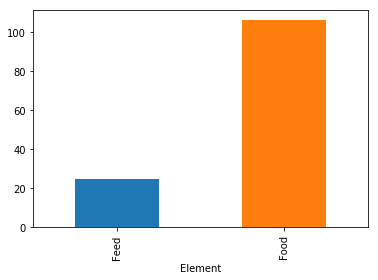

In [279]:
df_pak.groupby('Element')['Item'].count().plot(kind='bar')

Pakistan is producing more Food Items than feed. Let's find out what are top 4 food items in 1961 and 2013

In [280]:
"""
=========== ALL RELATED TO FOOD ==================
"""

# fig, ax = plt.subplots(figsize=(30,17))
# ax.set_title('Top 5 Pakistani Food')
# ax.set_xlabel('Items')
# ax.set_ylabel('Quantity in Tonnes')
df_pak = df_pak.set_index('Item')
# Adding percentages
df_pak['percent_change'] = (df_pak['Y2013'] / df_pak['Y1961']) * 100

#df_pak[df_pak['Element'] == 'Food'].nlargest(5,['Y1961','Y2013'])[['Y1961','Y2013']].plot(kind='bar',ax=ax)
df_pak[df_pak['Element'] == 'Food'].nlargest(5,['Y1961','Y2013'])[['Y1961','Y2013']]


,Y1961,Y2013
Item,,
Sugar cane,1194.0,3375
Sugar Crops,1194.0,3375
Cereals - Excluding Beer,5995.0,25839
Milk - Excluding Butter,5129.0,33356
Wheat and products,4201.0,20696


So Pakistan is producing Milk at abundance and it is a huge difference in last 50+ years.

Now, though they are Top 5 but let's see in % change what are top 5

In [281]:

# fig, ax = plt.subplots(figsize=(10,5))
# ax.set_title('Top 5 Pakistani Food in terms of % Change')
# ax.set_xlabel('Items')
# ax.set_ylabel('% Change')

# df_pak[df_pak['Element'] == 'Food'].nlargest(5,['percent_change'])[['percent_change']].plot(kind='bar',ax=ax)
items = []
df_pak = df_pak.replace([np.inf, -np.inf], np.nan)
df_2 = df_pak[df_pak['Element'] == 'Food'].nlargest(5,['percent_change'])[['percent_change']]
#print(round(df_2))
#df_pak[df_pak['Element'] == 'Food'].nlargest(7,['percent_change'])[['percent_change']].plot(kind='bar',ax=ax)
for idx in df_2.index:
    items.append(idx)
items

['Poultry Meat',
 'Eggs',
 'Eggs',
 'Sugar (Raw Equivalent)',
 'Apples and products']

In terms of % Pakistan got into some new markets.
Now let's see whether Pakistan's top items are also being sold by surrounding countries

In [282]:
south_asian_countries = ['Afghanistan','Pakistan','Bangladesh','India','Bhutan','Maldives','Nepal','Sri Lanka']
south_asian_df = df[(df['Area'].isin(south_asian_countries)) & (df['Element'].isin(['Food']))]

south_asian_df = south_asian_df[south_asian_df['Item'].isin(items)]

south_asian_df = south_asian_df[['Item','Area','Y1961','Y2013','Element']]
south_asian_df = south_asian_df.set_index('Item')
south_asian_df

,Area,Y1961,Y2013,Element
Item,,,,
Sugar (Raw Equivalent),Afghanistan,45.0,255,Food
Apples and products,Afghanistan,14.0,68,Food
Poultry Meat,Afghanistan,6.0,75,Food
Eggs,Afghanistan,8.0,40,Food
Eggs,Afghanistan,8.0,40,Food
Sugar (Raw Equivalent),Bangladesh,59.0,853,Food
Apples and products,Bangladesh,0.0,148,Food
Poultry Meat,Bangladesh,19.0,220,Food
Eggs,Bangladesh,16.0,326,Food


In [283]:
grouped_df = south_asian_df.groupby('Area')
c = ['Afghanistan','Pakistan','Inida']
# for key, item in grouped_df:
#    print(grouped_df.get_group(key), "\n\n")


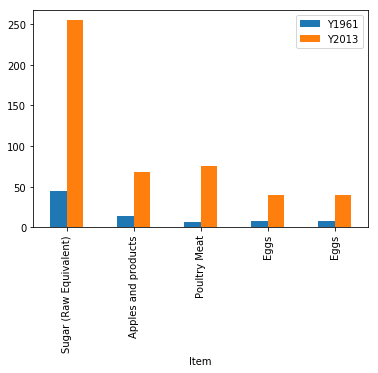

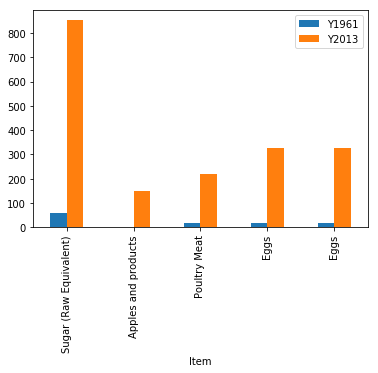

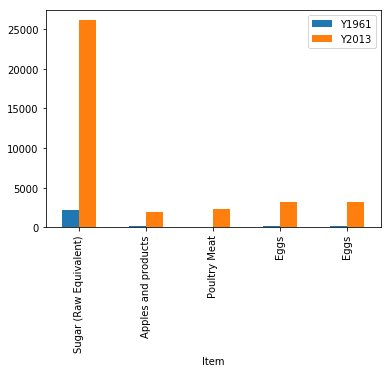

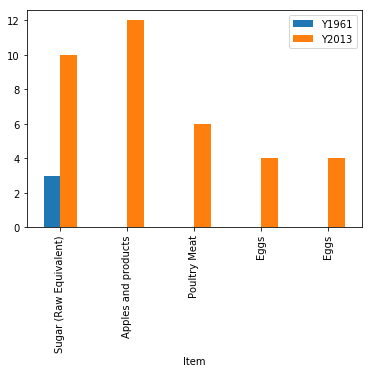

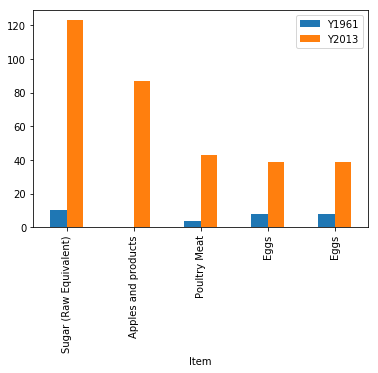

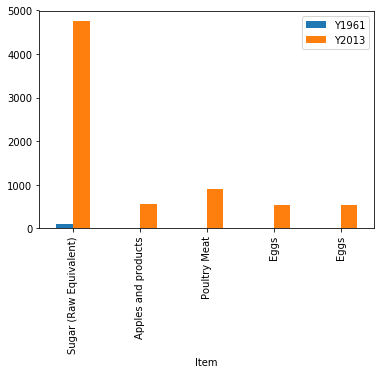

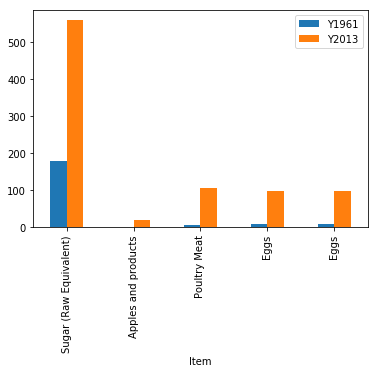

In [284]:
grouped_df = south_asian_df.groupby('Area').plot(kind='bar')